# Week 10

## CI / CD
 
- [**Introduction to GitHub Actions**](https://docs.github.com/en/free-pro-team@latest/actions/learn-github-actions/introduction-to-github-actions)
- [**Building and testing Python with GitHub Actions**](https://docs.github.com/en/free-pro-team@latest/actions/guides/building-and-testing-python)
 
## testing

- [**`pytest` documentation**](https://docs.pytest.org/en/latest/contents.html)

- [**`doctest` — Test interactive Python examples**](https://docs.python.org/3/library/doctest.html)

- [**`unittest`**](https://docs.python.org/3/library/unittest.html)

```


```

---

## Timer

docs:
- [**`dataclasses`**](https://docs.python.org/3/library/dataclasses.html) | [PEP 557 -- Data Classes](https://www.python.org/dev/peps/pep-0557/)
- [**`contextlib.ContextDecorator`**](https://docs.python.org/3/library/contextlib.html#contextlib.ContextDecorator) - this will allow us to use timer class (written as a context manager) as a decorator and write more elegant code
- [type annotations](https://docs.python.org/3/library/typing.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (8,6)})
%config InlineBackend.figure_format = 'retina'

from timer import Timer

```



```

## I/O-Bound program & Threading

- [**`threading`**](https://docs.python.org/3/library/threading.html)

- [**`concurrent.futures`**](https://docs.python.org/3/library/concurrent.futures.html) — Launching parallel tasks

- [**global interpreter lock**](https://docs.python.org/3/glossary.html#term-global-interpreter-lock)

- [**Deadlock wiki**](https://en.wikipedia.org/wiki/Deadlock)

- [**Race condition wiki**](https://en.wikipedia.org/wiki/Race_condition)

In [2]:
from ping import ping, ping_threaded, ips


with Timer(name='ping'):
    print(ping(ips)[0][:20], '  ...')
    
with Timer(name='ping_threaded'):
    print(ping_threaded(ips)[0][:20], '  ...')


Pinging google.com    ...
ping: 24.9596 seconds

Pinging ranepa.ru [   ...
ping_threaded: 6.7126 seconds


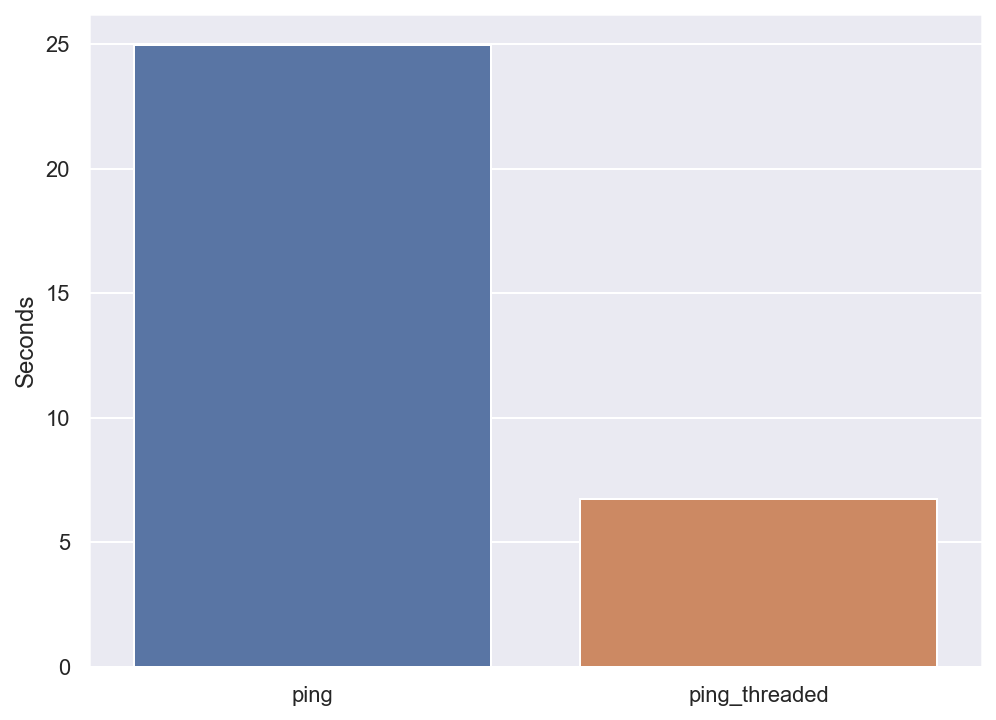

In [3]:
df = pd.DataFrame.from_dict(Timer.timers, orient='index').T
plt.ylabel('Seconds')
sns.barplot(data=df)
Timer.timers = {}

```





```

## CPU-Bound program & Multiprocessing


- [**`multiprocessing`**](https://docs.python.org/3/library/multiprocessing.html)
- [**Synchronization**](https://en.wikipedia.org/wiki/Synchronization_(computer_science))

- [**`concurrent.futures.Executor`**](https://docs.python.org/3/library/concurrent.futures.html#concurrent.futures.Executor)

The only sane usage of threaded function on a cpu-bound program is with one thread.

In [4]:
df = pd.read_csv('vscode.csv')

In [5]:
Timer.timers = {}
# df = pd.DataFrame(columns=['index', 0])

# check on multiple arrays
for i in range(5):
    
    # generate ramdom arrays
    a, b = (np.random.randn(100_000) for i in range(2))

    # with numpy
    with Timer(name='numpy'):
        np.dot(a, b)
    
    df_temp = pd.DataFrame.from_dict(Timer.timers, orient='index').reset_index()
    df_temp.rename(columns = {'index':'name', 0:'time'}, inplace = True)
    print(df_temp)
    df = df.append(df_temp)
#     df = df.append(df_temp, ignore_index=True)
    Timer.timers = {}

# df.rename(columns = {'index':'name', 0:'time'}, inplace = True)

numpy: 0.0007 seconds
    name      time
0  numpy  0.000747
numpy: 0.0003 seconds
    name      time
0  numpy  0.000316
numpy: 0.0004 seconds
    name      time
0  numpy  0.000394
numpy: 0.0001 seconds
    name      time
0  numpy  0.000115
numpy: 0.0001 seconds
    name      time
0  numpy  0.000138


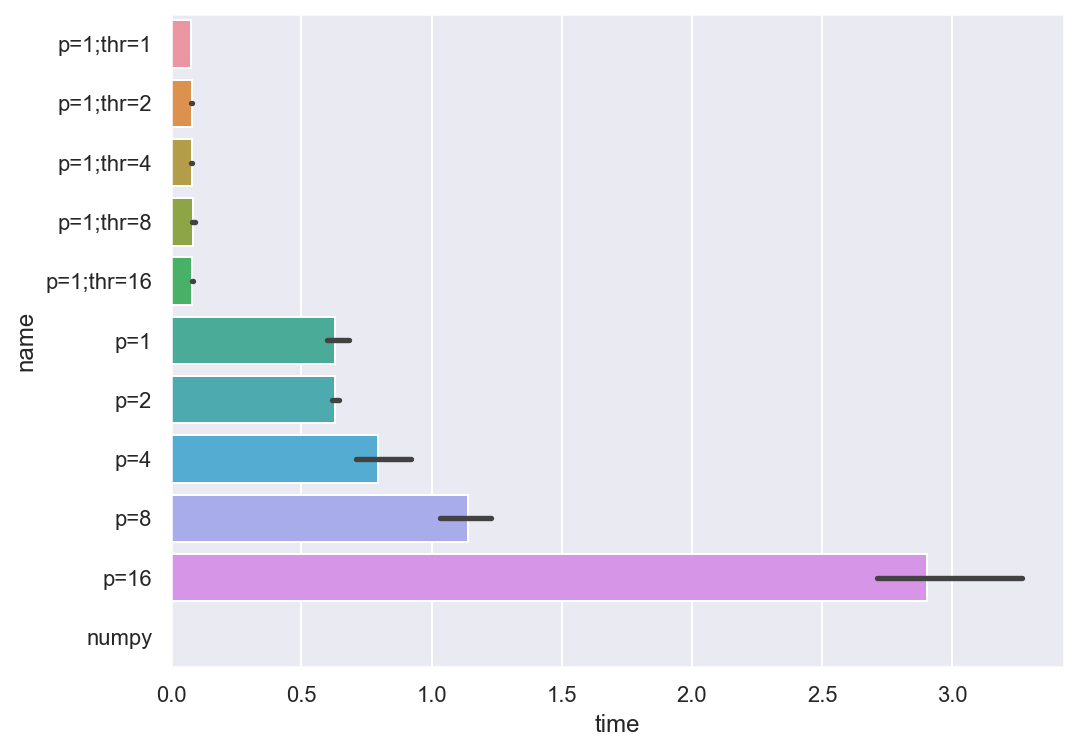

In [6]:
sns.barplot(data=df, x='time', y='name');